<a href="https://colab.research.google.com/github/dtype2100/Coding_test/blob/master/address_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab.patches import cv2_imshow
from PIL import Image
from IPython.display import Image # 코랩에서 PIL show 보여주기

In [ ]:
paths = glob.glob('/content/drive/MyDrive/wachi_코드 공유/Test_image/img_a1_gothic/*png')
path = paths[0]
img = cv2.imread(path)

In [ ]:
img.shape

(442, 546, 3)

In [ ]:
# imshow 함수 정의
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [ ]:
blur = cv2.medianBlur(img, 5) # 이미지 블러(median blur 사용 - 잡음 제거 효과)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY) # threshold 적용을 위해 흑백 전환
bright_gray = cv2.add(gray, 50) # 밝기 조절(명도)
dst = cv2.normalize(bright_gray, None, 0, 255, cv2.NORM_MINMAX) # 대비 조절(대비)

# 적응형 threshold 적용
blk_size = 9        # 블럭 사이즈
C = 5               # 차감 상수 
th_gaussian = cv2.adaptiveThreshold(dst, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blk_size, C)
edges = cv2.Canny(th_gaussian, 250 ,255) # 윤곽선 검출

kernel = np.ones((5,5), np.uint8) # Morphological Transformations
result_mg = cv2.morphologyEx(edges, cv2.MORPH_GRADIENT, kernel) # Morphological Transformations



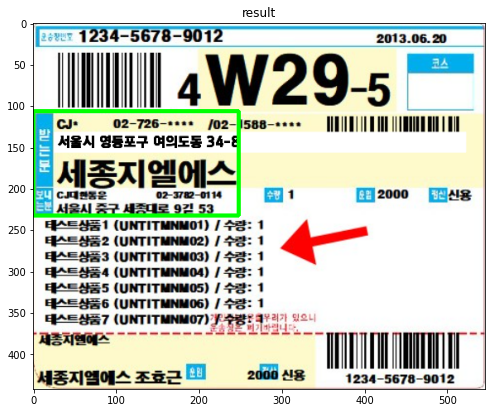

In [ ]:
# contours 찾기 (contours = 같은 값을 가진 곳을 연결한 선)
contours, _ = cv2.findContours(result_mg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# findContours = 가장 큰 면적을 찾는 함수

# 가장 큰 contours 찾기
biggest_cntr = None
biggest_area = 0
for contour in contours:
    area = cv2.contourArea(contour)
    if area > biggest_area:
        biggest_area = area
        biggest_cntr = contour

# 외곽 box
rect = cv2.minAreaRect(biggest_cntr)
# minAreaRect = 주어진 점을 감싸는 최소 크기 회전된 사각형을 찾음
box = cv2.boxPoints(rect)
box = np.int0(box)

# 외곽 box 그리기
src_box = img.copy()
cv2.drawContours(src_box, [box], 0, (0, 255, 0), 3) # (22, 130), (520,160)

imshow('result', src_box)

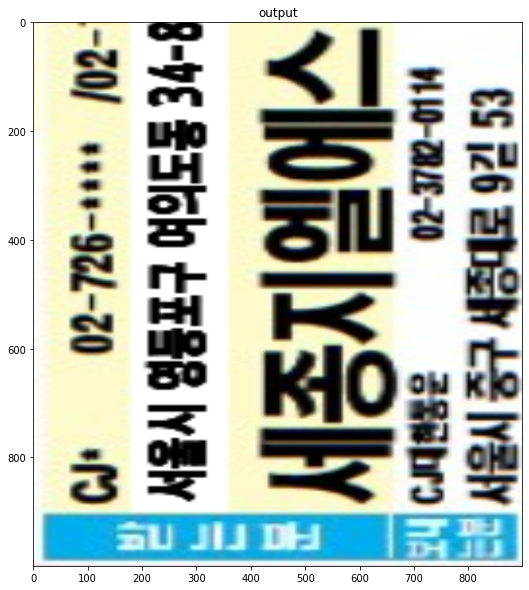

In [ ]:
# Order obtained here is top left, bottom left, bottom right, top right
inputPts = np.float32(box)
outputPts = np.float32([[0,22], [0,0], [900,0], [900,1000]]) # (22, 130), (520,160)

# Get our Transform Matrix, M
M = cv2.getPerspectiveTransform(inputPts,outputPts)

# Apply the transform Matrix M using Warp Perspective
output = cv2.warpPerspective(img, M, (900,1000))
imshow('output', output)

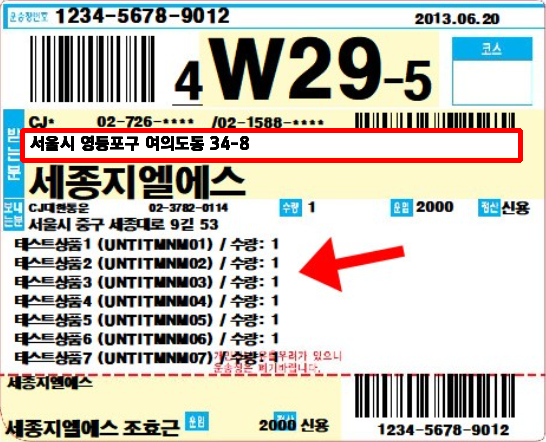

In [ ]:
imageRectangle = img.copy()
cv2.rectangle(imageRectangle, (22, 130), (520,160), (0, 0, 255), thickness=3, lineType=cv2.LINE_8)
cv2_imshow(imageRectangle)

In [ ]:
blur = cv2.medianBlur(imageRectangle, 5) # 이미지 블러(median blur 사용 - 잡음 제거 효과)
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY) # threshold 적용을 위해 흑백 전환
bright_gray = cv2.add(gray, 50) # 밝기 조절(명도)
dst = cv2.normalize(bright_gray, None, 0, 255, cv2.NORM_MINMAX) # 대비 조절(대비)

# 적응형 threshold 적용
blk_size = 9        # 블럭 사이즈
C = 5               # 차감 상수 
th_gaussian = cv2.adaptiveThreshold(dst, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blk_size, C)
edges = cv2.Canny(th_gaussian, 250 ,255) # 윤곽선 검출

kernel = np.ones((5,5), np.uint8) # Morphological Transformations
result_mg = cv2.morphologyEx(edges, cv2.MORPH_GRADIENT, kernel) # Morphological Transformations

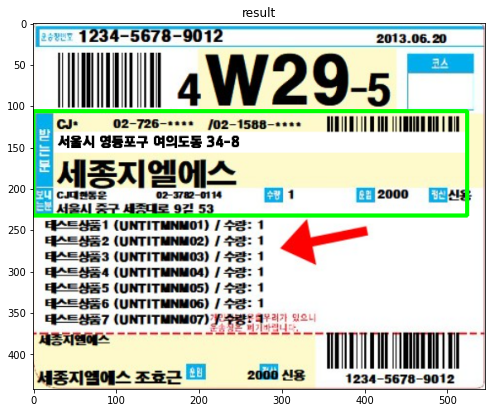

In [ ]:
# contours 찾기 (contours = 같은 값을 가진 곳을 연결한 선)
contours, _ = cv2.findContours(result_mg, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# findContours = 가장 큰 면적을 찾는 함수

# 가장 큰 contours 찾기
biggest_cntr = None
biggest_area = 0
for contour in contours:
    area = cv2.contourArea(contour)
    if area > biggest_area:
        biggest_area = area
        biggest_cntr = contour

# 외곽 box
rect = cv2.minAreaRect(biggest_cntr)
# minAreaRect = 주어진 점을 감싸는 최소 크기 회전된 사각형을 찾음
box = cv2.boxPoints(rect)
box = np.int0(box)

# 외곽 box 그리기
src_box = img.copy()
cv2.drawContours(src_box, [box], 0, (0, 255, 0), 3) # (22, 130), (520,160)

imshow('result', src_box)

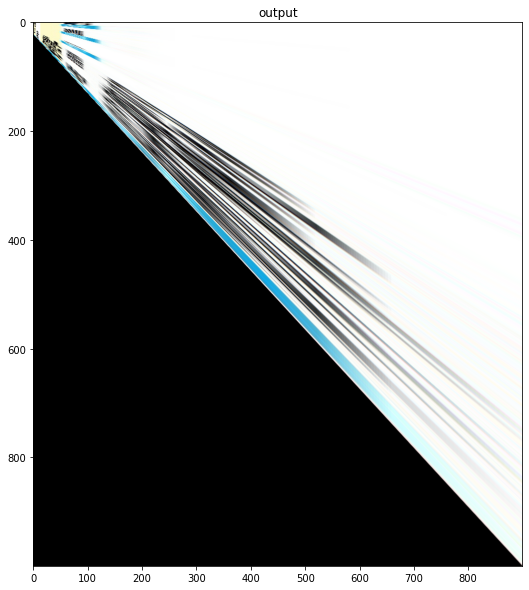

In [ ]:
# Order obtained here is top left, bottom left, bottom right, top right
inputPts = np.float32(box)
outputPts = np.float32([[0,22], [0,0], [900,0], [900,1000]]) # (22, 130), (520,160)

# Get our Transform Matrix, M
M = cv2.getPerspectiveTransform(inputPts,outputPts)

# Apply the transform Matrix M using Warp Perspective
output = cv2.warpPerspective(img, M, (900,1000))
imshow('output', output)

In [ ]:
#import PIL.Image
from PIL import Image
from IPython.display import Image # 코랩에서 PIL show 보여주기
#from tkinter import Tk, Button, Canvas

In [ ]:
image1 = PIL.Image.open(path)
image1.show

<bound method Image.show of <PIL.PngImagePlugin.PngImageFile image mode=RGB size=546x442 at 0x7F03ED6A8810>>

In [ ]:
cropImage = image1.crop((22, 130, 520, 160))

In [ ]:
cropImage.show()

In [ ]:
cropImage.size

(498, 30)

In [ ]:
cropImage

In [ ]:
type(cropImage)

PIL.Image.Image

In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 5 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 0s (10.2 MB/s)
debconf: unable to initial

In [ ]:
!sudo apt-get install tesseract-ocr-kor # 한국어 설치

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  tesseract-ocr-kor
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 1,050 kB of archives.
After this operation, 1,693 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-kor all 4.00~git24-0e00fe6-1.2 [1,050 kB]
Fetched 1,050 kB in 0s (4,125 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling b

In [ ]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 4.8 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


In [ ]:
import pytesseract

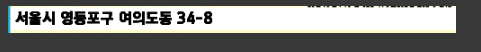

In [ ]:
text = pytesseract.image_to_string(cropImage, lang='kor')
print(text)

 

서울시 영등포구 여의도동 34-8

